#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**Simulating the density function (histograms) of theoretical distributions**

no actual dataset is used

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format, scientific_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
output = dirname + "da_case_studies/ch03-simulations/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
obs = 100000

Set random seed globally here

In [5]:
rng = np.random.default_rng(16460)

In [6]:
# Bernoulli
bernoulli = pd.DataFrame(rng.binomial(1, 0.7, obs), columns=["bernoulli"])

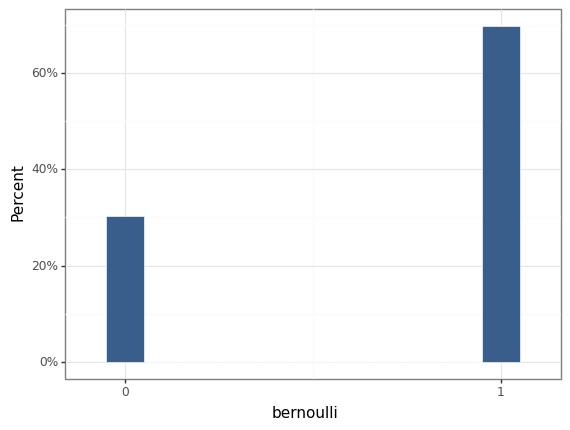

<ggplot: (393479313)>

In [7]:
(
    ggplot(bernoulli, aes(x="bernoulli", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(limits=(-0.1, 1.1), breaks=seq(0, 1, by=1))
    + scale_y_continuous(labels=percent_format())
    + theme_bw()
)


In [8]:
# Binomial
# with smaller sample
Nbinom = 20

binomial = pd.DataFrame(rng.binomial(Nbinom, 0.4, obs), columns=["binomial"])

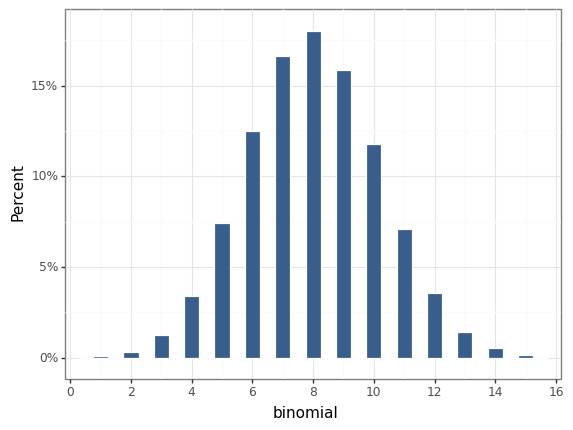

<ggplot: (393597266)>

In [9]:
(
    ggplot(binomial, aes(x="binomial", y="stat(count)/sum(stat(count))"))
    + geom_histogram(color="white", fill=color[0], binwidth=0.5)
    + labs(y="Percent")
    + scale_y_continuous(expand=(0.01, 0.01), labels=percent_format())
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 16), breaks=seq(0, 16, by=2))
    + theme_bw()
)


In [10]:
# uniform
uniform = pd.DataFrame(rng.uniform(0, 1, obs), columns=["uniform"])

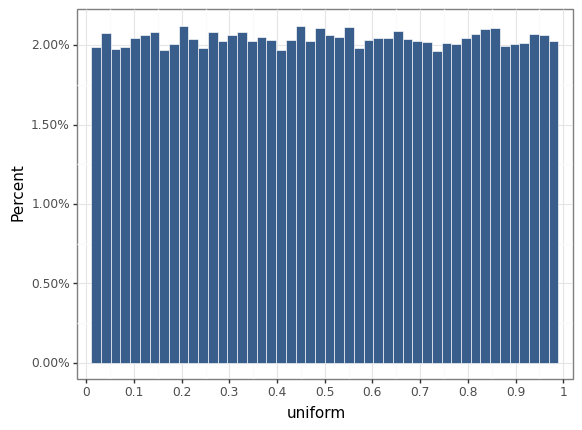

<ggplot: (393652649)>

In [11]:
(
    ggplot(uniform, aes(x="uniform", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        bins=50,
        center=1,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 1), breaks=seq(0, 1, by=0.1))
    + scale_y_continuous(expand=(0.001, 0.001), labels=percent_format())
    + theme_bw()
)


In [12]:
# normal
normal = pd.DataFrame(rng.normal(0, 1, obs), columns=["normal"])

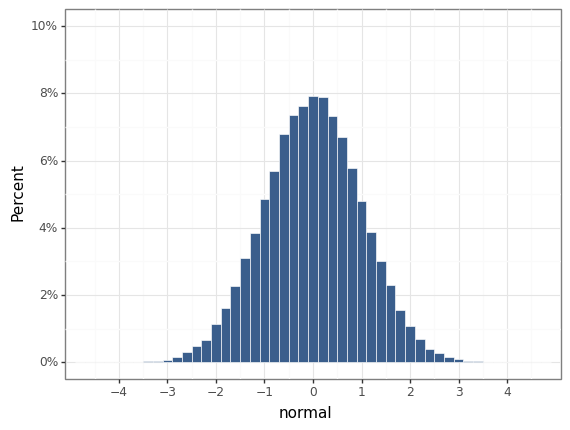

<ggplot: (393780574)>

In [13]:
(
    ggplot(normal, aes(x="normal", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.2,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(y="Percent")
    + scale_y_continuous(
        labels=percent_format(), limits=(0, 0.1), breaks=seq(0, 0.1, by=0.02)
    )
    + scale_x_continuous(expand=(0.01, 0.01), limits=(-5, 5), breaks=seq(-4, 4, by=1))
    + expand_limits(x=0.01, y=0.01)
    + theme_bw()
)


In [14]:
# lognoromal
# take the exponential of the randomly generated normal above
lognormal = pd.DataFrame(np.exp(normal["normal"]).values, columns=["lognormal"])

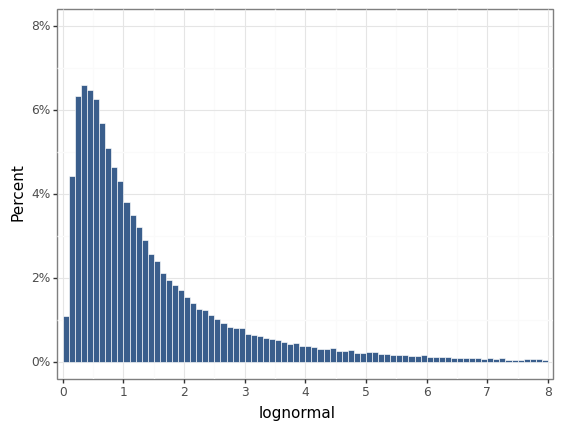

<ggplot: (393780499)>

In [15]:
(
    ggplot(
        lognormal.query("lognormal<10"),
        aes(x="lognormal", y="stat(count)/sum(stat(count))"),
    )
    + geom_histogram(
        binwidth=0.1,
        boundary=0.0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(y="Percent")
    + scale_y_continuous(
        labels=percent_format(), limits=(0, 0.08), breaks=seq(0, 0.08, by=0.02)
    )
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 8), breaks=seq(0, 8, by=1))
    + expand_limits(x=0, y=0)
    + theme_bw()
)


In [16]:
# power-law
alpha = 3
xmin = 1
x = seq(1, obs, 1)
X = np.power(x, float(-alpha))
powerlaw = xmin * X
histrange = np.quantile(powerlaw, 0.75)
powerlaw = powerlaw / sum(powerlaw)
powerlaw = pd.DataFrame(powerlaw, columns=["powerlaw"])

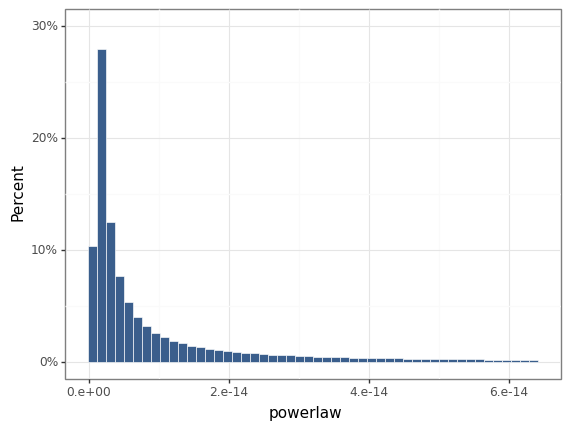

<ggplot: (394084877)>

In [17]:
(
    ggplot(
        powerlaw.query("powerlaw < @histrange"),
        aes(x="powerlaw", y="stat(count)/sum(stat(count))"),
    )
    + geom_histogram(
        bins=50,
        boundary=0.5,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(y="Percent")
    + scale_y_continuous(
        labels=percent_format(), limits=(0, 0.3), breaks=seq(0, 0.3, by=0.1)
    )
    + scale_x_continuous(labels=scientific_format())
    + theme_bw()
)